![](Cintilla2004.png)

## **Curso de Inteligencia Artificial con Python y Scikit-Leaarn**
### Instructor: Dr. José Gabriel Rodríguez Rivas

## Tabla de Contenido

[1. Contexto de la práctica](#id1)<br>
[2. Evaluar dataset](#id2)<br>
[3. Análisis exploratorio de los datos](#id3)<br>
...  [3.1 Plazo del prestamo y taza de interés](#id31)<br>
...  [3.2 Calificación del préstamo](#id32)<br>
...  [3.3 Calificación del préstamo y tasa de interés](#id33)<br>
...  [3.4 Préstamos por Estado ](#id34)<br>
...  [3.5 Distribución Anual de Ingresos de los Prestatarios](#id35)<br>
...  [3.6 Ingreso anual del prestatario por estado](#id36)<br>
...  [3.7 Ingreso anual y Tasa de Interés](#id37)<br>
...  [3.8 Préstamos emitidos durante el año](#id38)<br>
...  [3.9 Evolución de la tasa de interés ](#id39)<br>
...  [3.10 Estado del prestamo](#id310)<br>
...  [3.11 Explorar la tasa de pago de préstamos a tres y cinco años](#id311)<br>
...  [3.12 Estado del préstamo y taza de pago por calificacion del prestamo](#id312)<br>
[4. Preparación de datos](#id4)<br>
...  [4.1 Codificar el estado del prestamo en una nueva columna](#id41)<br>
...  [4.2 Codificar el Plazo del préstamo](#id42)<br>
...  [4.3 Codificar características categóricas ](#id43)<br>
...  [4.4 Manejar Valores perdidos](#id44)<br>
[5. Preparación del modelo](#id5)<br>
...  [5.1 Selección de Variables predictoras](#id51)<br>
...  [5.2 Dividir el dataframe de datos para entrenar y probar](#id52)<br>
[6. Logistic Regression ó Regresión logistica](#id6)<br>
...  [6.1 Regresión logística sin balanceo de clases ](#id61)<br>
...  [6.2 Regresión logística con peso de clase balanceado ](#id62)<br>
[7. Evaluación del modelo - Matriz de confusión](#id7)<br>
...  [7.1 Evaluación con matriz de confusión en clasificador 1](#id71)<br>
...  [7.2 Evaluación con matriz de confusión en clasificador 2](#id72)<br>
[8 Clasificador K-Nearest Neighbors (KNN) ](#id8)<br>
...  [8.1 Clasificador KNN con 1 vecino](#id81)<br>
...  [8.2 Clasificador KNN con 5 vecinos](#id82)<br>
...  [8.3 Clasificador KNN con 15 vecinos](#id83)<br>
...  [8.4 Clasificador KNN con 25 vecinos](#id84)<br>
[9. Random Forest Classifier ó Clasificador de bosque aleatorio](#id9)<br>
...  [9.1 Clasificador de bosque aleatorio con peso de clase predeterminado](#id91)<br>
...  [9.2 Clasificador de bosque aleatorio con class_weight='balanced'](#id92)<br>
[10. Selección de características (feature selection) con scikit-learn](#id10)<br>

   


## 1. Contexto de la práctica    <a id='id1'> </a>

- En la primera parte, se enfocará en **comprender los objetivos y requisitos del dataset a utilizar desde una perspectiva comercial**, comenzando con la comprensión de cómo funciona el **club de prestamos Lending Club**.

### Club de préstamos

LendingClub es una compañía estadounidense de **préstamos entre pares**, con sede en San Francisco, California. Es la plataforma de préstamos peer-to-peer más grande del mundo.

**LendingClub**
- permite a los **prestatarios solicitar préstamos personales no garantizados** entre  1,000 y 40,000. 
- Los **inversionistas pueden buscar y explorar las listas de préstamos** en el sitio web de LendingClub **y seleccionar los préstamos en los que desean invertir según la información proporcionada sobre el prestatario, el monto del préstamo, el grado del préstamo y el propósito del préstamo**, con una inversión mínima de $25. 
- Los inversionistas ganan dinero con los intereses. 
- LendingClub gana dinero cobrando a los prestatarios una tarifa de originación y a los inversionistas una tarifa de servicio.

Para obtener más información sobre la empresa, consulte el artículo de wikipedia sobre [LendingClub](https://en.wikipedia.org/wiki/LendingClub).


-  En la segunda parte, se realizará una regresion logistica.


## 2. Evaluar Dataset   <a id='id2'> </a>

El archivo de datos **lending_club_2007_2011_6_states.csv** contiene la información del préstamo y del prestatario para los préstamos iniciados entre 2007 y 2011 en seis estados, California, Nueva York, Florida, Texas, Nueva Jersey e Illinois.

El archivo de diccionario de datos **data_dictionary.csv** contiene descripciones de todas las columnas del archivo de datos.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data_dict = pd.read_csv("data_dictionary.csv", encoding= "ISO-8859-1")
data_dict

,ColumnName,Descripcion,Description
0,acc_now_delinq,El número de cuentas en las que el prestatario...,The number of accounts on which the borrower i...
1,addr_state,El estado proporcionado por el prestatario en ...,The state provided by the borrower in the loan...
2,annual_inc,Los ingresos anuales autodeclarados proporcion...,The self-reported annual income provided by th...
3,application_type,Indica si el préstamo es una solicitud individ...,Indicates whether the loan is an individual ap...
4,chargeoff_within_12_mths,Número de cancelaciones en 12 meses,Number of charge-offs within 12 months
5,collection_recovery_fee,tasa de cobro post cargo,post charge off collection fee
6,collections_12_mths_ex_med,Número de cobros en 12 meses excluyendo cobros...,Number of collections in 12 months excluding m...
7,debt_settlement_flag,"Indica si el prestatario, que ha cancelado, es...","Flags whether or not the borrower, who has cha..."
8,debt_settlement_flag_date,La fecha más reciente en la que se ha establec...,The most recent date that the Debt_Settlement_...
9,delinq_2yrs,El número de incidencias de morosidad de más d...,The number of 30+ days past-due incidences of ...


In [6]:
prestamos_df = pd.read_csv('lending_club_2007_2011_6_states.csv')
prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


- Usar la función `loan_df.info()` para imprimir información básica del DataFrame. 
- Al ejecutar la instruccion **info()**, se observa que existen datos incompletos.


In [8]:
prestamos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    19908 non-null  int64  
 1   funded_amnt                  19908 non-null  int64  
 2   funded_amnt_inv              19908 non-null  float64
 3   term                         19908 non-null  object 
 4   int_rate                     19908 non-null  float64
 5   installment                  19908 non-null  float64
 6   grade                        19908 non-null  object 
 7   sub_grade                    19908 non-null  object 
 8   emp_title                    18723 non-null  object 
 9   emp_length                   19409 non-null  object 
 10  home_ownership               19908 non-null  object 
 11  annual_inc                   19908 non-null  float64
 12  verification_status          19908 non-null  object 
 13  issue_d         

### Variables comunes importantes

#### Características del préstamo:
- loan_amnt: Monto solicitado del préstamo.
- int_rate: Tasa de interés del préstamo.
- term: Plazo del préstamo (36 o 60 meses).
- installment: Monto de la cuota mensual.

#### Características del solicitante:
- annual_inc: Ingreso anual declarado por el solicitante.
- emp_length: Años de experiencia laboral.
- home_ownership: Propiedad de vivienda (Renta, Propietario, Hipotecado).
- verification_status: Estado de verificación de ingresos.

####  Características relacionadas con la deuda:
-  (Debt-to-Income Ratio): Relación deuda-ingreso.
- revol_bal: Saldo rotativo en tarjetas de crédito.
- revol_util: Porcentaje de utilización de crédito rotativo.
- total_acc: Número total de cuentas de crédito.

#### Historial crediticio:
- earliest_cr_line: Fecha de apertura de la primera línea de crédito.
- delinq_2yrs: Número de morosidades en los últimos 2 años.
- pub_rec: Número de registros públicos negativos (bancarrota, embargos).

#### Otros factores:
- purpose: Propósito del préstamo (p. ej., consolidación de deuda, pago de tarjetas).
- addr_state: Estado de residencia del solicitante

#####  El método `df.isnull().sum()` permite  verificar el recuento de valores nulos de cada columna.

In [11]:
prestamos_df.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       1185
emp_length                       499
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                              5
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq         12910
mths_since_last_record         18699
open_acc                           0
p

- Imprimir las **estadísticas descriptivas** que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos.


In [13]:
prestamos_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,1.990800e+04,19908.000000,19908.000000,19908.000000,6998.000000,...,19908.000000,0.0,19893.0,0.0,19908.0,19908.0,19893.0,19908.0,19595.000000,19898.0
mean,11353.846444,11065.763763,10500.929748,12.089717,330.614254,7.107345e+04,13.008619,0.143962,0.829466,35.841097,...,2636.253711,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.037969,0.0
std,7463.700492,7176.276661,7106.229650,3.698287,210.557434,6.980565e+04,6.663658,0.489576,1.044978,21.599170,...,4412.964304,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.191393,0.0
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5750.000000,5600.000000,5000.000000,9.450000,171.287500,4.200000e+04,7.840000,0.000000,0.000000,19.000000,...,222.530000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
50%,10000.000000,10000.000000,9000.000000,11.860000,285.780000,6.000000e+04,13.075000,0.000000,0.000000,34.000000,...,544.700000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14500.000000,14.610000,440.815000,8.500000e+04,18.200000,0.000000,1.000000,51.000000,...,3193.352500,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,24.400000,1302.690000,6.000000e+06,29.990000,11.000000,8.000000,106.000000,...,35596.410000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,2.000000,0.0


###  3. Analisis Exploratorio de los Datos - EDA    <a id='id3'> </a>

EDA es un enfoque para analizar conjuntos de datos para **resumir sus características principales**, a menudo con visualizaciones.

Para características **categóricas**, podemos verificar:
- Valores únicos en la categoría.
- Recuento de cada categoría.
- Agregación de otras características continuas para cada categoría.

Para características **continuas**, podemos verificar:
- Distribuciones
- Correlaciones de múltiples características

Haremos una demostración de EDA con dos características, plazo del préstamo y tasa de interés.

### 3.1 Plazo del prestamo y taza de interés  <a id='id31'> </a>

Explorar la característica del plazo del préstamo, la tasa de interés y la relación entre ellos.

Durante el analisis, **descubrimos que**:
- Hay dos plazos diferentes, **36 meses y 60 meses**.
- Hay aproximadamente **tres veces más préstamos a 36 meses** que préstamos a 60 meses en el conjunto de datos.
- La **tasa de interés** está en el **rango de 5% a 25%**. 
- La mayoría de los préstamos tienen una tasa de interés entre **5-17%**.
- Los **préstamos a 36 meses** tienen una **tasa de interés promedio significativamente más baja que la de los préstamos a 60 meses**.

#### Plazo del prestamo

In [17]:
# Mostrar los valores unicos en la columna plazo, nos damos cuenta que
# Hay dos plazos diferentes, **36 meses y 60 meses.

prestamos_df.term.unique()

array(['36 months', '60 months'], dtype=object)

In [18]:
# Contar ocurrencias de cada plazo
# 14, 852 prestamos a un plazo de 36 meses y
# 5,056 prestamos a 60 meses
# Hay aproximadamente tres veces más préstamos a 36 meses que 
# préstamos a 60 meses en el conjunto de datos.

prestamos_df.term.value_counts()

term
36 months    14852
60 months     5056
Name: count, dtype: int64

In [19]:
sns.set_theme(rc={'figure.figsize':(6, 4)})
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Text(0, 0.5, 'Número de prestamos')

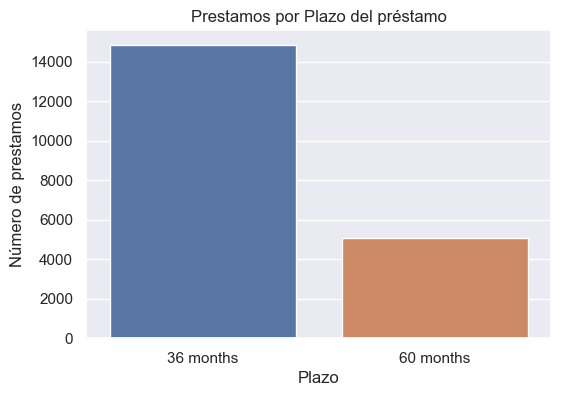

In [20]:
# Podemos usar un grafico de barras para mostrar los conteos de
# observaciones en cada contenedor categórico usando barras.

# Un gráfico de conteo se puede considerar como un histograma para 
# una variable categórica, en lugar de una variable cuantitativa. 

ax = sns.countplot(x = 'term', data=prestamos_df, order=sorted(prestamos_df.term.unique()))
ax.set_title('Prestamos por Plazo del préstamo')
ax.set_xlabel('Plazo')
ax.set_ylabel('Número de prestamos')


#### Taza de Interes

<Axes: >

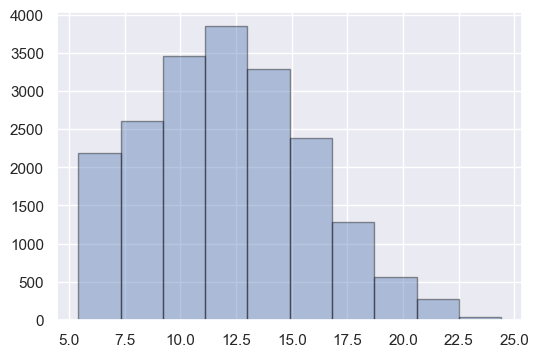

In [22]:
# Generamos un histograma para verificar la distribucion de
# la taza de interes,   con esto nos damos cuenta que ..
# La mayoría de los préstamos tienen una tasa de interés entre 5 y el 17.5 %.

prestamos_df.int_rate.hist(edgecolor='black', alpha=0.4)

####   Promedio de Interés de diferentes plazos

In [24]:
# Calculamos la taza promedio por plazo y nos damos cuenta que:

# Los préstamos a 36 meses tienen una tasa de interés promedio significativamente más 
# baja que la de los préstamos a 60 meses

prestamos_df.groupby('term').agg({'int_rate':'mean'})

,int_rate
term,
36 months,11.121125
60 months,14.934955


Text(0.5, 0, 'Plazo')

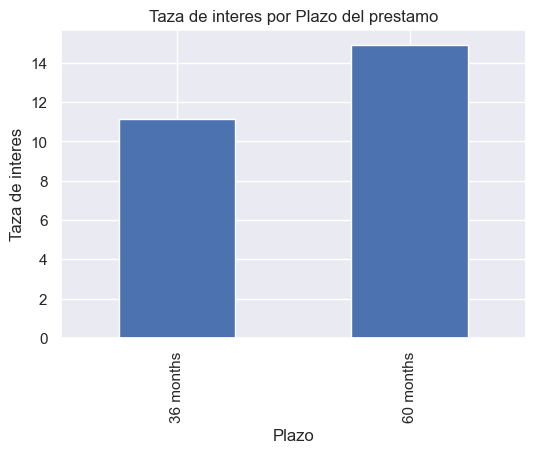

In [25]:
#  Graficamos el cálculo anterior

# Los préstamos a 36 meses tienen una tasa de interés promedio significativamente  
# más baja que la de los préstamos a 60 meses

ax = prestamos_df.groupby('term').agg({'int_rate':'mean'}).plot.bar(legend = False)
ax.set_title('Taza de interes por Plazo del prestamo')
ax.set_ylabel('Taza de interes')
ax.set_xlabel('Plazo')

### 3.2 Calificación del préstamo   <a id='id32'> </a>

- En casode que Lending Club opta por aprobar su solicitud, le **asigna una calificación crediticia (que mide la probabilidad de incumplimiento del préstamo) y la tasa de interés de su préstamo**. Las calificaciones de préstamos incluyen una letra (A - G) 
- La calificación **A1, la calificación de mayor calidad**, pueden esperar **tasas de interés bajas de alrededor de 5.99%** sobre el préstamo de 36 meses, mientras que aquellos con calificación G5 pueden esperar tasas de 35.89% sobre el préstamo de 36 meses.

¿Cuántas calificaciones de préstamo diferentes hay en el conjunto de datos?

- **grade** es una **variable categórica**, podemos usar **value_counts()** para verificar los recuentos de cada categoría.
- Un gráfico de recuento de Seaborn es una buena manera de visualizar características categóricas.
- Trazamos un gráfico de barras (con gráficos de seaborn countplot) para el grado. 
- El **eje X es la calificación del préstamo (grade)** y el **eje Y es el recuento de préstamos (loans)**. Para ordenar la calificación del préstamo, puede configurar **order=sorted(loan_df.grade.unique())** en el gráfico de conteo.

In [27]:
prestamos_df.grade.value_counts()

grade
B    6065
A    4875
C    4087
D    2748
E    1434
F     540
G     159
Name: count, dtype: int64

In [28]:
prestamos_df.groupby('grade').agg({'grade':'count'})

,grade
grade,
A,4875
B,6065
C,4087
D,2748
E,1434
F,540
G,159


Text(0, 0.5, 'Cantidad de prestamos')

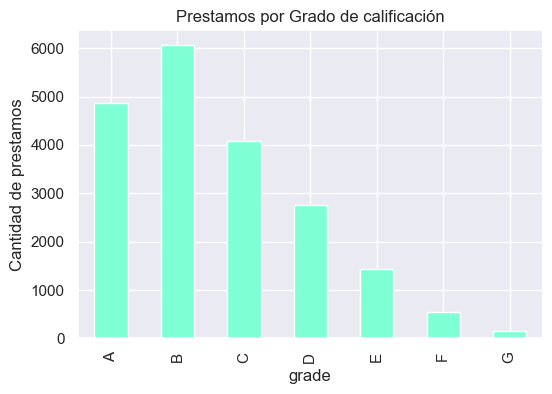

In [29]:
# Podemos graficar directamente con el metodo plot de dataframe
# matplotlib no es muy adecuadopara elmanejo de colores
# en su lugar se puede usar la libreria seaborn que permite especificar paletas de colores

ax = prestamos_df.groupby('grade').agg({'grade':'count'}).plot.bar(legend = False, 
                                                                   color='aquamarine' )
ax.set_title('Prestamos por Grado de calificación')
ax.set_ylabel('Cantidad de prestamos')



Text(0.5, 1.0, 'Prestamos por Grado de calificación del prestamo')

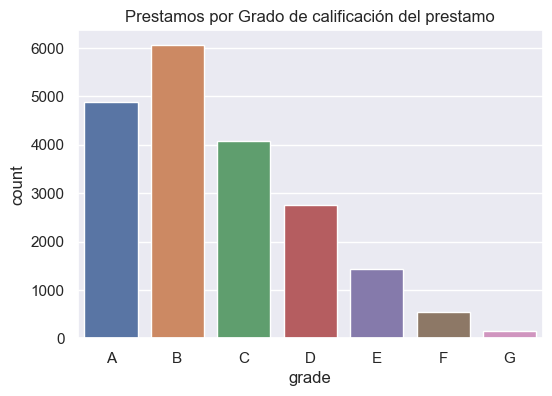

In [30]:
# Tambien podemos usar la libreria seaborn 
# usando countplot

ax = sns.countplot(x = 'grade',data = prestamos_df,  
                   order=sorted( prestamos_df.grade.unique() ) )
ax.set_title('Prestamos por Grado de calificación del prestamo')

Text(0.5, 1.0, 'Prestamos por Grado')

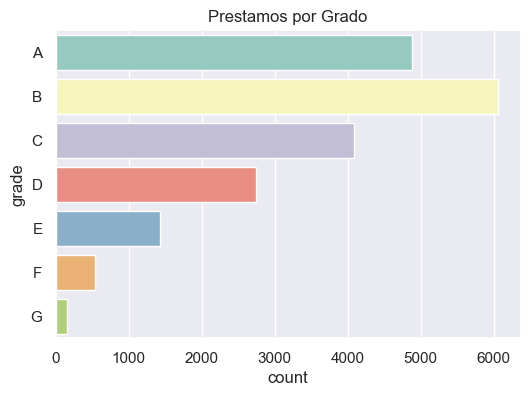

In [31]:
# Paa hacerlo horizontal, especificmos que el valor de grade lo ponemos
# en el eje y

ax = sns.countplot(y='grade',data=prestamos_df, palette="Set3", 
                   order=sorted(prestamos_df.grade.unique()))
ax.set_title('Prestamos por Grado')


### 3.3 Calificación del préstamo y tasa de interés    <a id='id33'> </a>

Explorar la relación entre la calificacion del préstamo y la tasa de interés.

- Obtener la tasa de interés promedio para cada grado de préstamo.
  - Agrupar por la columna de calificación.
  - Aplicar la función agregada de la media en la columna int_rate.
- Visualizar la tasa de interés promedio de cada grado de préstamo con un gráfico de barras. Asegúrese de que la grafica tenga las etiquetas y el título adecuados.
- Discutir la relación brevemente.

**Sugerencia**: Puede trazar directamente un gráfico de barras en un objeto groupby agregado. es decir. `ax = df.groupby(...).agg(...).plot.bar()`

In [33]:
# Para calcular la taza de interes por la calificacion del prestamo

# Agrupamos por la columna de grado y 
# Aplicamos la función agregada de la media en la columna de la taza de ineteres  int_rate.

prestamos_df.groupby('grade').agg({'int_rate':'mean'})

,int_rate
grade,
A,7.350978
B,11.033439
C,13.555241
D,15.707576
E,17.653752
F,19.729463
G,21.346981


Text(0, 0.5, 'Taza de interés')

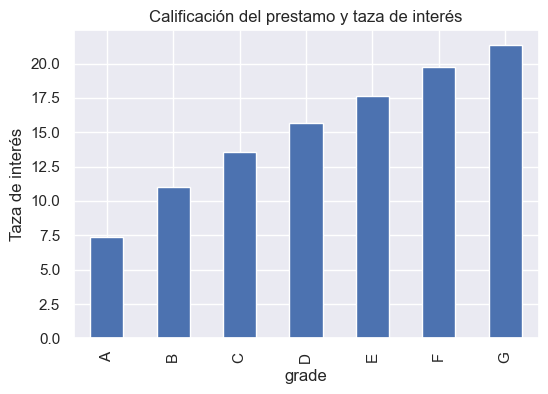

In [34]:
# Podemos graficar directamente con el metodo plot de dataframe

ax = prestamos_df.groupby('grade').agg({'int_rate':'mean'}).plot.bar(legend = False)
ax.set_title('Calificación del prestamo y taza de interés')
ax.set_ylabel('Taza de interés')

### 3.4 Préstamos por Estado  <a id='id34'> </a>

- Hay préstamos de seis estados en el conjunto de datos. 
- Explorar el recuento de préstamos en cada estado a través de la visualización.

- Visualizar recuentos de préstamos en cada estado. 


In [36]:
prestamos_df.groupby('addr_state').agg({'addr_state':'count'})

,addr_state
addr_state,
CA,7105
FL,2872
IL,1525
NJ,1855
NY,3817
TX,2734


Text(0, 0.5, 'Estado')

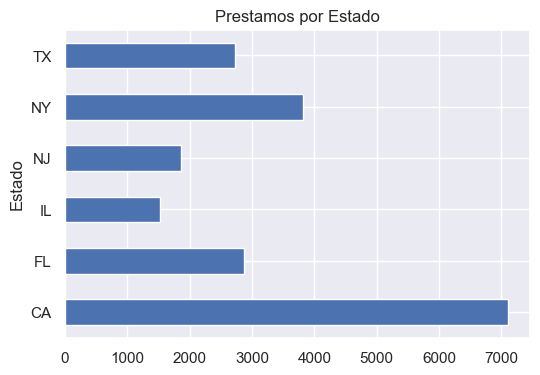

In [37]:
ax = prestamos_df.groupby('addr_state').agg({'addr_state':'count'}).plot.barh(legend = False)
ax.set_title('Prestamos por Estado')
ax.set_ylabel('Estado')

###  3.5 Distribución Anual de Ingresos de los Prestatarios   <a id='id35'> </a>

- Trazar un histograma de todos los ingresos anuales del prestatario.
- Trace otro histograma de ingresos anuales que sea inferior a $250.000.
- Comparar los diagramas  y discutir brevemente.

**Sugerencia**: Filtrar los  préstamos por ingreso anual, es decir, `prestamos_df[prestamos_df.annual_inc<250000]`


<Axes: >

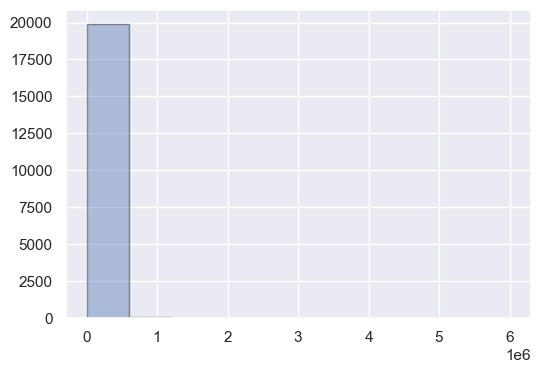

In [39]:
# histograma general del ingreso anual 

prestamos_df.annual_inc.hist(edgecolor='black', alpha=0.4)

In [40]:
# Usamos la opcion describe para ver los estadisticos descriptivos de la columna ingreso Anual
# Servira para darnos una idea como esta la distribucion 

prestamos_df.annual_inc.describe()

count    1.990800e+04
mean     7.107345e+04
std      6.980565e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.500000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: >

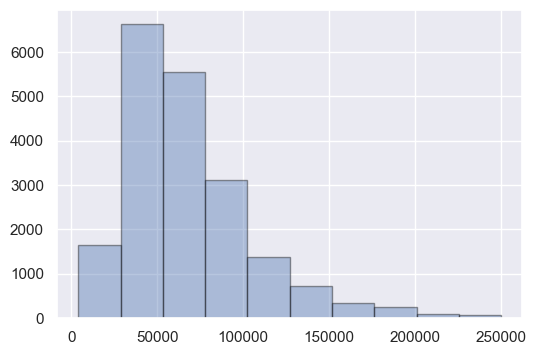

In [41]:
# histograma de los que ganan menos de 250 mil 

prestamos_df[prestamos_df.annual_inc<250000].annual_inc.hist(edgecolor='black', alpha=0.4)

<Axes: >

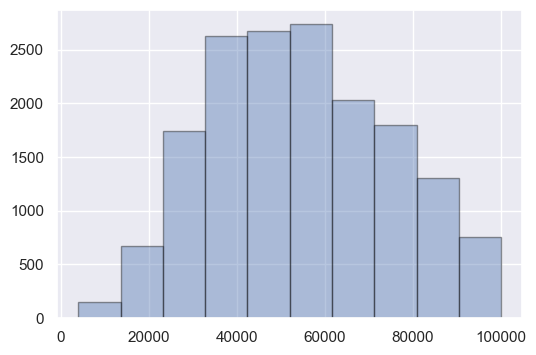

In [42]:
# histograma de los ue ganan menos de 100 mil 

prestamos_df[prestamos_df.annual_inc<100000].annual_inc.hist(edgecolor='black', alpha=0.4)


### 3.6. Ingreso anual del prestatario por estado  <a id='id36'> </a>

- Visualice el ingreso **medio** de los prestatarios de cada estado con un gráfico de barras.
  - **Agrupar** por la columna **addr_state**.
  - Aplicar la función agregada **mediana** en la columna anual_inc.

- Discutir el resultado brevemente

**Sugerencia**: Puede trazar directamente un gráfico de barras en un objeto groupby agregado. es decir. `ax = df.groupby(...).agg(...).plot.bar()`

Text(0, 0.5, 'Estado')

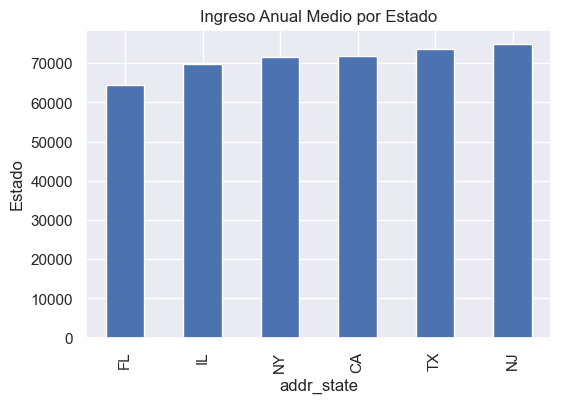

In [44]:
ax = prestamos_df.groupby('addr_state').agg({'annual_inc':'mean'}).sort_values("annual_inc").plot.bar(legend = False)
ax.set_title('Ingreso Anual Medio por Estado')
ax.set_ylabel('Estado')

###  3.7 Ingreso Anual y Tasa de Interés   <a id='id37'> </a>

- Trazar un diagrama de dispersión sobre el ingreso anual y la tasa de interés
- Trazar otro diagrama de dispersión con un ingreso anual inferior a $300,000
- Discutir el resultado, **¿el diagrama de dispersión revela alguna correlación entre el ingreso anual y la tasa de interés?**

<Axes: xlabel='annual_inc', ylabel='int_rate'>

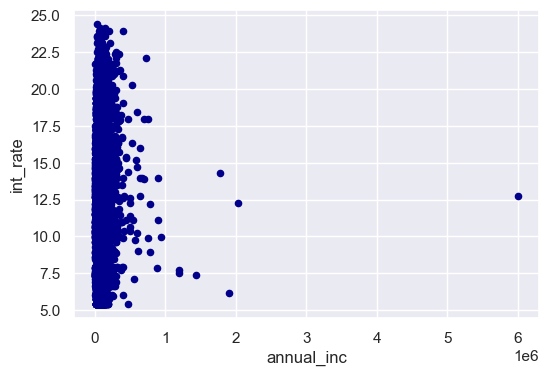

In [46]:
# diagrama de dispersion de ingresos anuales y taza de interes

prestamos_df.plot.scatter( x='annual_inc',  y='int_rate', c='DarkBlue')


<Axes: xlabel='annual_inc', ylabel='int_rate'>

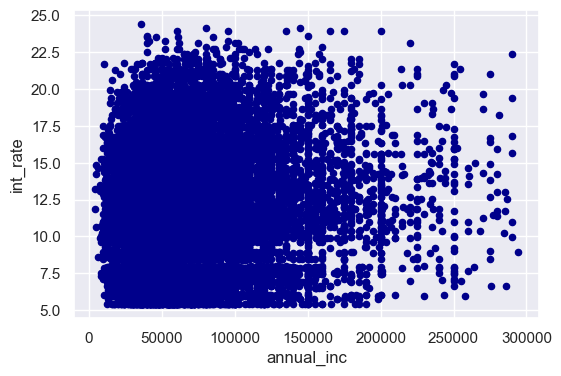

In [47]:
# diagrama de dispersion de ingresos anuales y taza de interes de los que ganan menos de 300 mil

prestamos_df[prestamos_df.annual_inc<300000].plot.scatter( x='annual_inc',  y='int_rate', c='DarkBlue')

<Axes: xlabel='int_rate', ylabel='annual_inc'>

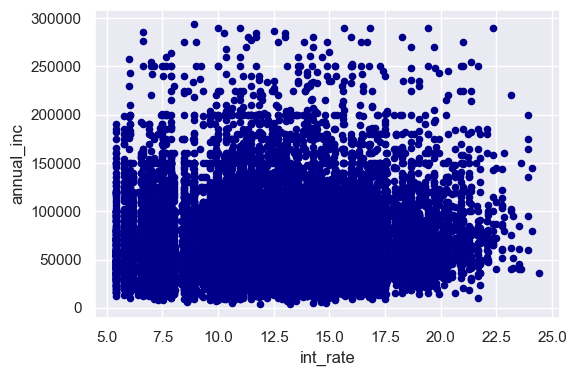

In [48]:
# diagrama de dispersion de ingresos anuales y taza de interes de los que ganan menos de 300 mil
# invertimos los ejes

prestamos_df[prestamos_df.annual_inc<300000].plot.scatter( x='int_rate',  y='annual_inc', c='DarkBlue')

### 3.8 Préstamos emitidos durante el año  <a id='id38'> </a>

- Debido a la forma en que viene la fecha, vamos a **convertir la informacion del campo issue_d (El mes en que se financió el préstamo) en tipo fecha**, para crear una nueva columna con el numero de año y poder graficar el numero de prestamos por año
- Convertir la columna **issue_d  (El mes en que se financió el préstamo)** a un tipo de fecha y hora
- Crear una nueva columna, **issue_year**, y configurarla en el año en que se emitió un préstamo
- Mostrar las primeras cinco filas


Explorar la cantidad de préstamos emitidos a través de LendingClub entre 2007 y 2011

- Obtenga un conteo de préstamos en cada año (Sugerencia: **agrupe** por **issue_year** y aplique la función agregada 'recuento' en cualquier columna).
- Trace un gráfico de líneas para ver la tendencia, el eje x es el año, el eje y es el conteo.
- Discutir el resultado brevemente.

**Sugerencia**: Puede trazar directamente un gráfico de líneas en un objeto groupby agregado. es decir. `ax = df.groupby(...).agg(...).plot.line()`

In [50]:
# verificar la informacion del campo  issue_d

prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


In [51]:
# Convertir la columna issue_d (El mes en que se financió el préstamo) a un tipo de fecha y hora

prestamos_df['issue_d'] = pd.to_datetime(prestamos_df['issue_d'])

C:\Users\jgab\AppData\Local\Temp\ipykernel_24820\343196801.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prestamos_df['issue_d'] = pd.to_datetime(prestamos_df['issue_d'])


In [52]:
# verificar la informacion del campo  issue_d

prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN


In [53]:
# Crear una nueva columna, issue_year, y configúrela en el año en que se emitió un préstamo

prestamos_df['issue_year'] = prestamos_df['issue_d'].dt.year 

In [54]:
# Verificamos

prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011


#### Ahora si ya podemos graficar el numero de prestamos por año

Text(0, 0.5, 'Prestamos')

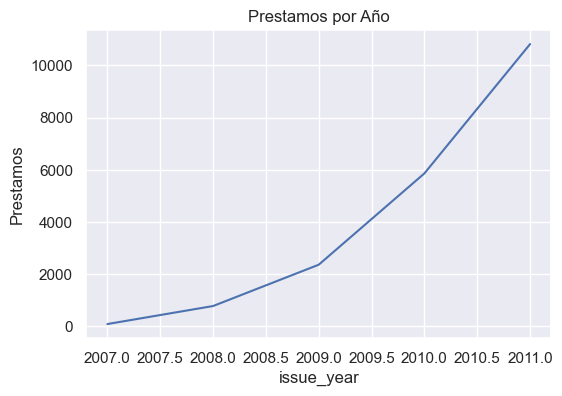

In [56]:
ax = prestamos_df.groupby('issue_year').agg({'annual_inc':'count'}).sort_values("annual_inc").plot.line(legend = False)
ax.set_title('Prestamos por Año')
ax.set_ylabel('Prestamos')

### 3.9 Evolución de la tasa de interés   <a id='id39'> </a>

Explorar el cambio de la tasa de interés en cada estado a lo largo de los años.

- Crear tabla dinámica, establecer
  - index to issue_year
  - columns to addr_state
  - values to int_rate
  - aggfunc to median
- Trazar un gráfico de líneas para comparar el cambio de la tasa de interés promedio, durante los años en los 6 estados.

**Sugerencia**: Se puede trazar directamente un gráfico de líneas en una tabla dinámica. es decir. `ax = df.pivot_table(...).plot.line()`

In [58]:
prestamos_df.pivot_table( index='issue_year', columns='addr_state', values= 'int_rate', aggfunc=np.mean)

addr_state,CA,FL,IL,NJ,NY,TX
issue_year,,,,,,
2007,10.338000,10.616538,8.540000,10.698667,11.145250,8.225000
2008,11.472444,10.935263,11.194833,11.430143,11.187348,10.927321
2009,12.232144,12.191182,11.966685,12.199434,12.479330,12.403735
2010,12.001526,11.643763,11.694765,12.122847,11.846824,11.757327
2011,12.236692,12.152918,12.281881,12.386044,12.221262,12.214518


<Axes: xlabel='issue_year'>

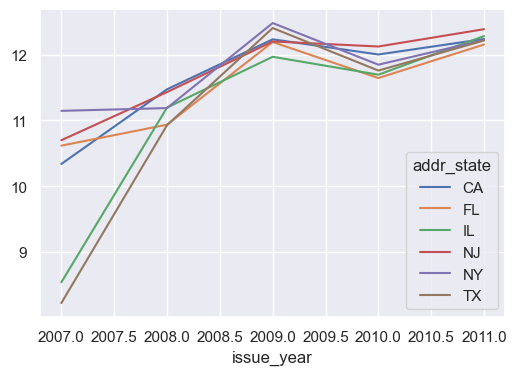

In [59]:
prestamos_df.pivot_table( index='issue_year', columns='addr_state', values= 'int_rate', aggfunc=np.mean).plot.line()

### 3.10  Estado del prestamo  <a id='id310'> </a>

Los préstamos en el conjunto de datos se emitieron antes de 2011 y el plazo de préstamo más largo es de 5 años. Por lo tanto, todos los préstamos se pagan o se cancelan.

Explorar el estado del préstamo y descubra:
- El número de préstamos pagados y el numero de préstamos cancelados
- Tasa de pago de todo el conjunto de datos.

$Taza de pago = \frac{TotalmentePagado}{Totalmente Pagado+Cargado}$

$PaidOffRate = \frac{FullyPaid}{Fully Paid+Charged Off}$


In [61]:
prestamos = prestamos_df["loan_status"].value_counts()
prestamos

loan_status
Fully Paid     16965
Charged Off     2943
Name: count, dtype: int64

In [62]:
tazadePago = prestamos["Fully Paid"] / (prestamos["Fully Paid"] + prestamos["Charged Off"])
tazadePago

0.8521699819168174

### 3.11 Explorar la tasa de pago de préstamos a tres y cinco años.   <a id='id311'> </a>

- Crear la tabla dinámica **tazaPago_x_plazo** a partir de loan_df, establecer
  - **index** to term
  - **columns** to loan_status
  - **values** to int_rate(or any column since we simply count)
  - **aggfunc** to count
- Calcular la tasa de cancelación de préstamos de diferentes plazos
   - Crear una nueva columna `payoffRate` en la tabla dinámica **tazaPago_x_plazo** que creó. 
   - Calcular la tasa de pago para cada plazo de préstamo con la fórmula   
     
   $tazaPago = \frac{FullyPaid}{Fully Paid+Charged Off}$.  
       
- Mostrar la tabla dinámica.


In [64]:
prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,0.0,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011


In [65]:
tazaPago_x_plazo = prestamos_df.pivot_table( index='term', columns='loan_status', 
                                            values= 'int_rate', aggfunc=np.size)
tazaPago_x_plazo

loan_status,Charged Off,Fully Paid
term,,
36 months,1728,13124
60 months,1215,3841


In [66]:
# Calculamos la taza de pago de los diferentes plazos de pago

tazaPago_x_plazo["payoffRate"] = tazaPago_x_plazo["Fully Paid"] / ( tazaPago_x_plazo["Fully Paid"] + tazaPago_x_plazo["Charged Off"])
tazaPago_x_plazo

loan_status,Charged Off,Fully Paid,payoffRate
term,,,
36 months,1728,13124,0.883652
60 months,1215,3841,0.759691


### 3.12 Estado del préstamo y taza de pago por calificacion del prestamo <a id='id312'> </a>

Explorar la tasa de pago de diferentes grados de préstamo.

- Crear una tabla dinámica **tazaPago_x_grado** a partir de préstamo_df, y establecer
  - **index** to grade
  - **columns** to loan_status
  - **values** to int_rate(or any column since we simply count)
  - **aggfunc** to count
- Calcular la tasa de cancelación de préstamos de diferentes grados
   - Crear una nueva columna `payoffRate` en la tabla dinámica **tazaPago_x_grado** que se acaba de hacer. 
   - Calcular la tasa de pago para cada grado de préstamo con la fórmula:
   
    $tazaPago = \frac{FullyPaid}{Fully Paid+Charged Off}$.  
      
      
- Mostrar la tabla dinámica.


In [68]:
tazaPago_x_grado = prestamos_df.pivot_table( index='grade', 
                columns='loan_status', values= 'int_rate', aggfunc=np.size)
tazaPago_x_grado

loan_status,Charged Off,Fully Paid
grade,,
A,304,4571
B,779,5286
C,672,3415
D,579,2169
E,378,1056
F,174,366
G,57,102


In [69]:
# Agregamos la columna Taza de pago por grado del credito  y   verificamos la taza de pago de los creditos 

tazaPago_x_grado["payoffRate"] = tazaPago_x_grado["Fully Paid"] / ( tazaPago_x_grado["Fully Paid"] + tazaPago_x_grado["Charged Off"])
tazaPago_x_grado

loan_status,Charged Off,Fully Paid,payoffRate
grade,,,
A,304,4571,0.937641
B,779,5286,0.871558
C,672,3415,0.835576
D,579,2169,0.789301
E,378,1056,0.736402
F,174,366,0.677778
G,57,102,0.641509


### 4. Preparación de datos, modelado y evaluación de modelos  <a id='id4'> </a>

La preparación de datos implica la limpieza de los datos, es decir, se ocupa de los valores faltantes y crea nuevas características a través de la ingeniería de características.

### 4.1 Codificar el estado del prestamo en una nueva columna   <a id='id41'> </a>

- El conjunto de datos tiene préstamos iniciados entre 2007 y 2011. 
- Todos **los préstamos han sido pagados en su totalidad o cancelados**. 
- Agregar la columna 'repaid' () en prestamos_df codificando el estado del préstamo y mapeando:  

**loan_status**:
- Charged Off to 0 
- Fully Paid to 1.


In [72]:
# Verificamos cuantos estan totalmente pagados y cuantos todavian están con cargo

prestamos_df.loan_status.value_counts()

loan_status
Fully Paid     16965
Charged Off     2943
Name: count, dtype: int64

In [73]:
# Agregamos una columna con valores 0 y 1 a partir de la columna  loan_status, es decir los 
# que  estan totalmente pagados con un (1) y los que están cancelados en (0)
#  cancelados a 0   y pagados a 1

# La columna repaid se usara mas adelante como parte del modelo de clasificacion, y servira para predecir
# si un prestamos se pagará o no

mapping_dict = {'Charged Off':0, 'Fully Paid':1}
prestamos_df['repaid'] = prestamos_df.loan_status.map(mapping_dict)

prestamos_df.repaid.value_counts()

repaid
1    16965
0     2943
Name: count, dtype: int64

In [74]:
# Verifcamos al final la nueva columna 

prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,1
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,0
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,0.0,0.0,0.0,0.0,N,Cash,N,NaN,2011,0


### Taza de pago 
Con la columna de pago recién creada, podemos **calcular la tasa de pago de todos los préstamos en el conjunto de datos** con el valor medio de la columna, que es aproximadamente el 85 %, como se muestra en la siguiente celda de código.

In [76]:
prestamos_df.repaid.mean()

0.8521699819168174

### 4.2 Codificar el Plazo del préstamo   <a id='id42'> </a>

Crear una nueva columna `loan_term_year` en **loan_df**, que tiene un valor entero:
- 3 si el plazo del préstamo (term) es '36 meses'  (3 años)
- 5 si el plazo del préstamo (term) es '60 meses'.  (5 años)

A continuación, calcule la tasa de reembolso de los préstamos con diferente préstamo_término_año.  

**Sugerencia:** agrupe por `loan_term_year` y aplique la media de la función agregada en la columna `repaid`.

In [78]:
# Verifico como viene el plazo

prestamos_df["term"].head()

0    36 months
1    36 months
2    36 months
3    60 months
4    60 months
Name: term, dtype: object

In [79]:
# Creamos una nueva columna con valores entero de acuerdo al plazo del prestamo

mapping_dict = {'36 months':3, '60 months':5}
prestamos_df['loan_term_year'] = prestamos_df.term.map(mapping_dict)

prestamos_df.loan_term_year.value_counts()

loan_term_year
3    14852
5     5056
Name: count, dtype: int64

In [80]:
prestamos_df.term.value_counts()

term
36 months    14852
60 months     5056
Name: count, dtype: int64

In [81]:
# calculamos la tasa de reembolso de los préstamos 

prestamos_df.groupby("loan_term_year").agg( { "repaid" : "mean" } )

,repaid
loan_term_year,
3,0.883652
5,0.759691


###  4.3 Codificar características categóricas   <a id='id43'> </a>

Exploramos la relación entre las siguientes **variables categóricas y la taza de pago (variable repaid)**. 
- purpose
- grade
- home_ownership
- addr_state

Luego **codificamos las variables categoricas a numéricas** creando las siguientes columnas nuevas en loan_df.

- purpose_code
- grade_code
- home_ownership_code
- addr_state_code

Comprobar si faltan valores en las variables recién creadas.

Primero, verificamos la tasa de pago de los préstamos con diferentes propósitos y vemos los siguientes resultados
- Los préstamos para pequeñas empresas tienen la tasa de pago más baja 
- los préstamos para automóviles y bodas tienen la tasa de pago más alta. 
- También contamos el número de cada propósito. 
- Puede contar cualquier columna en el conjunto de datos, por ejemplo, la columna issue_d. 



In [99]:
# relación entre el propósito y la tasa de pago

# Como resultado podemos ver que
     # Los préstamos para pequeñas empresas tienen la tasa de pago  más baja
     # En cambio, los préstamos para automóviles y bodas tienen la tasa de pago más alta.

# tambien observamos que la mayoría de los préstamos en el conjunto de datos son para consolidación de deuda.


prestamos_df.groupby('purpose').agg({'repaid':'mean', 'issue_d':'count'})
                    sort_values(by='repaid')

IndentationError: unexpected indent (2313857041.py, line 11)

In [101]:
# Codificamos las variables categoricas usando la libreria sklearn   usando el metodo LabelEncoder

# Codificar las variables categoricas de destino con valores entre 0 y n_classes

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
prestamos_df['purpose_code'] = le.fit_transform(prestamos_df.purpose)

In [102]:
prestamos_df['purpose_code'].value_counts()

purpose_code
2     9389
1     2696
9     2060
4     1330
6     1048
11     905
0      687
13     539
7      350
8      317
12     199
5      176
3      161
10      51
Name: count, dtype: int64

#### Análisis de relación entre el estatus de la propiedad de la vivienda y la tasa de pago

In [106]:
# relación entre el estatus de la propiedad de la vivienda y la tasa de pago

# Como resultado podemos ver que:
        #La mayoria de los deudores viven de renta o tienen la casa  hipotecada
    
# MORTGAGE ==  HIPOTECA

prestamos_df.groupby('home_ownership').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
home_ownership,,
OTHER,0.818182,44
OWN,0.841527,1546
RENT,0.847620,10966
MORTGAGE,0.861379,7351
NONE,1.000000,1


In [108]:
prestamos_df["home_ownership"].value_counts()

home_ownership
RENT        10966
MORTGAGE     7351
OWN          1546
OTHER          44
NONE            1
Name: count, dtype: int64

In [110]:
le = LabelEncoder()
prestamos_df['home_ownership_code'] = le.fit_transform(prestamos_df.home_ownership)

In [112]:
prestamos_df['home_ownership_code'].value_counts()

home_ownership_code
4    10966
0     7351
3     1546
2       44
1        1
Name: count, dtype: int64

#### Análisis de relación entre la calificacion del riesgo del credito  y la tasa de pago

In [115]:
# relación entre el estatus de la calificacion del riesgo del credito  y la tasa de pago

# Como resultado podemos ver que 
      #  los prestamos con clasificacion A (los de menor riesgo) tienen la mayor taza de pago
      # mientras que los clasificados como G (Mayor riesgo) tienen la menor taza de pago
#  Hay mas prestamos clasificados como B y, enseguida A y C

prestamos_df.groupby('grade').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
grade,,
G,0.641509,159
F,0.677778,540
E,0.736402,1434
D,0.789301,2748
C,0.835576,4087
B,0.871558,6065
A,0.937641,4875


In [117]:
le = LabelEncoder()
prestamos_df['grade_code'] = le.fit_transform(prestamos_df.grade)

In [119]:
prestamos_df['grade_code'].value_counts()

grade_code
1    6065
0    4875
2    4087
3    2748
4    1434
5     540
6     159
Name: count, dtype: int64

#### Análisis de relación entre el estado de residencia del deudor   y la tasa de pago

In [122]:
# relación entre el estado de residencia del deudor  y la tasa de pago

# Como resultado podemos ver que california tiene el mayor numero de prestamos, mientras que illinois tiene el
# menor numero de prestamos, además, Texas tiene la mayor taza de pago, y florida tiene la menor taza de pago

prestamos_df.groupby('addr_state').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
addr_state,,
FL,0.822772,2872
CA,0.840816,7105
NJ,0.847978,1855
NY,0.868745,3817
IL,0.870164,1525
TX,0.882224,2734


In [124]:
le = LabelEncoder()
prestamos_df['addr_state_code'] = le.fit_transform(prestamos_df.addr_state)

In [126]:
prestamos_df['addr_state_code'].value_counts()

addr_state_code
0    7105
4    3817
1    2872
5    2734
3    1855
2    1525
Name: count, dtype: int64

In [128]:
# Verificamos los campos agregados, mostrando los primeros 10 registros

prestamos_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid,loan_term_year,purpose_code,home_ownership_code,grade_code,addr_state_code
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Cash,N,NaN,2011,1,3,11,4,2,2
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Cash,N,NaN,2011,1,3,9,4,2,0
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Cash,N,NaN,2011,1,3,0,4,4,0
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Cash,N,NaN,2011,0,5,11,3,5,0
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Cash,N,NaN,2011,0,5,9,4,1,5


### 4.4 Manejar Valores perdidos   <a id='id44'> </a>

- Algunas de las variables que utilizaremos para realizar la prediccion tiene valores nulos, por lo tanto, es enecesario llenar con datos los valores nulos. Se tiene que decidir cual sera la opcion para rellenar los valores nulos.


- Rellenar los valores que faltan en `revol_util` con el valor medio de la columna en prestamos_df. 
- Se decide reemplazar los valores faltantes con la media porque es una variable de tipo continua y para no generar un sesgo en la informacion
- Rellenar los valores que faltan en `pub_rec_bankruptcies` con 0 (Número de quiebras de registros públicos) en prestamos_df. esta **es una variable categorica y rellenamos con 0 por ser el valor de la  moda**

Después de completar los valores faltantes, verificamos de nuevo prestamos_df para asegurarnos de que no haya valores faltantes en las dos columnas. 
- Si aún faltan valores, es probable que no se utilizó la función fillna() de la manera correcta. 
- fillna() de forma predeterminada devuelve una columna con los valores faltantes completados, por lo que debe volver a asignar la columna completa a la columna original o establecer `inplace=True` en fillna(). 
- Si establece `inplace=True` en fillna(), no asigne el valor devuelto a la columna original, ya que la función modificará directamente la función de loan_df en su lugar y no devolverá nada.

In [132]:
# Verificamos la columna 29 revol_util que tiene 19889 mientras que en el dataset son 19908 , por lo tanto
# 19,9098 - 19,889 = 19 registros con valores nulos

prestamos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   loan_amnt                    19908 non-null  int64         
 1   funded_amnt                  19908 non-null  int64         
 2   funded_amnt_inv              19908 non-null  float64       
 3   term                         19908 non-null  object        
 4   int_rate                     19908 non-null  float64       
 5   installment                  19908 non-null  float64       
 6   grade                        19908 non-null  object        
 7   sub_grade                    19908 non-null  object        
 8   emp_title                    18723 non-null  object        
 9   emp_length                   19409 non-null  object        
 10  home_ownership               19908 non-null  object        
 11  annual_inc                   19908 non-nu

In [134]:
# mas facil si verificamos con la funcion isnull() 

# Contar valores nulos de la columna revol_util

# revol_util  significa:  
# Tasa de utilización de la línea renovable, o la cantidad de crédito que el prestatario 
# está utilizando en relación con todo el crédito renovable disponible


prestamos_df["revol_util"].isnull().sum()

19

In [136]:
# Verificamos que valores tiene la columna revol util
# revol util ==
#  Tasa de utilización de la línea renovable, o la cantidad de crédito que el prestatario 
#  está utilizando en relación con todo el crédito renovabl

prestamos_df['revol_util'].value_counts()

revol_util
0.00     455
0.20      38
78.70     34
32.00     34
57.40     33
        ... 
21.72      1
2.64       1
81.31      1
43.61      1
0.04       1
Name: count, Length: 1052, dtype: int64

In [140]:
# Calculamos el promedio de la columna  revol_util

avg_revol_util = prestamos_df['revol_util'].astype('float').mean(axis=0)
print("Promedio de revol_util:", avg_revol_util)

Promedio de revol_util: 49.42496606164211


In [142]:
# Asiganmos el valor calculado del promedio a los valores faltantes

prestamos_df["revol_util"].replace(np.nan, avg_revol_util, inplace=True)

In [144]:
# Volvemos a contabilizar los valores nulos en la columna revol_util

prestamos_df["revol_util"].isnull().sum()

0

####  Hacemos el mismo proceso con la columna  pub_rec_bankruptcies
    
-  Número de quiebras de registros públicos

In [147]:
# # Verificamos que valores tiene la columna

#  es una variable categorica y decdimos  rellenar con 0 por ser el valor de la  moda**

prestamos_df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    18852
1.0      742
2.0        1
Name: count, dtype: int64

In [149]:
# Contamos los valores nulos de la columna pub_rec_bankruptcies

prestamos_df["pub_rec_bankruptcies"].isnull().sum()

313

In [151]:
# Reemplazamos con cero los valores faltantes

prestamos_df["pub_rec_bankruptcies"].replace(np.nan, 0, inplace=True)

In [153]:
# Volvemos a Contar los valores nulos de la columna pub_rec_bankruptcies

prestamos_df["pub_rec_bankruptcies"].isnull().sum()

0

## 5. Preparación del Modelo  <a id='id5'> </a>

- Construir un modelo de clasificación para **predecir si un préstamo se pagará en su totalidad**. 
- La columna repaid ('cancelado') será la etiqueta. 
- **El propósito del modelo es identificar los préstamos que probablemente se pagarán en su totalidad.**

Completaremos los siguientes pasos:

- **Identificar las columnas** que necesitamos para el modelado y los próximos pasos.
- Crear un **DataFrame** df limpio **solo con las columnas necesarias**.
- Identificar las columnas necesarias para entrenar el modelo de clasificación.
- Crear un **conjunto de pruebas y entrenamiento** para el modelo de clasificación.
- Crear una etiqueta de entrenamiento y prueba para el modelo de clasificación.
- **Entrenar el modelo de clasificación**.
- **Predecir con el modelo de clasificación**.
- **Evaluar el modelo de clasificación**.  

- Realizaremos un modelo con **LogisticRegression**.
-  Realizaremos un modelo con **RandomForestClassifier**. 



### 5.1 Selección de Variables predictoras   <a id='id51'> </a>

Crearemos un DataFrame `df` limpio que mantiene las siguientes columnas en el DataFrame original `prestamos_df`.

**Para la seleccion de caracteristicas que se utilizarán para el modelo, la mejor opción es comprender los datos, y comprender las reglas del negocio**

Selecionamos las siguientes variables (columnas)

- **funded_amnt**             ( monto financiado)  La cantidad total comprometida con ese préstamo en ese momento.
- **loan_term_year**          ( Plazo del credito )
- **int_rate**                ( taza de interes )
- **grade_code**              ( codigo de la calificacion del crédito )
- **purpose_code**            ( codigo del proposito)
- **addr_state_code**         ( codigo de la ciudad)
- **home_ownership_code**     ( codigo situacion casa)
- **annual_inc**              ( ingresos anuales)
- **dti**                     ( Una relación calculada utilizando los pagos de deuda mensuales totales del prestatario )
- **revol_util**              ( cantidad de crédito que el prestatario está utilizando en relación con todo el crédito  )
- **pub_rec_bankruptcies**    ( Número de quiebras de registros públicos )
- **repaid**
- **total_pymnt**


Entre todas las columnas mantenidas,  **la etiqueta `repaid` será la elegida para el modelo de clasificación**.

Otras características se utilizarán para entrenar el modelo de clasificación.

- Solo las **características que están disponibles antes de que se inicie el préstamo pueden usarse en la clasificación**. 
- Las características como **recoveries** (recuperaciones o cargo posterior a la recuperación bruta), **total_rec_prncp** (Principal recibido a la fecha), que solo están disponibles después de que se cierra el préstamo, no deben incluirse en las funciones de entrenamiento. 
- Si la clasificación logra una tasa de precisión cercana al 100%, es probable que incluya características que solo estarán disponibles después de que se cierre el préstamo.



In [158]:
# columnas necesarias para entrenar el modelo de clasificacion
columns = ['funded_amnt', 'loan_term_year', 'int_rate', 'grade_code', 'purpose_code', 
                'addr_state_code', 'home_ownership_code', 'annual_inc', 'dti', 'revol_util', 
                'pub_rec_bankruptcies', 'repaid', 'total_pymnt']

In [160]:
# Crear DataFrame
df = prestamos_df[columns].copy()

In [162]:
df.head()

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt
0,2400,3,15.96,2,11,2,4,12252.0,8.72,98.5,0.0,1,3005.666844
1,10000,3,13.49,2,9,0,4,49200.0,20.00,21.0,0.0,1,12231.890000
2,3000,3,18.64,4,0,0,4,48000.0,5.35,87.5,0.0,1,3939.135294
3,5600,5,21.28,5,11,0,3,40000.0,5.55,32.6,0.0,0,647.500000
4,5375,5,12.69,1,9,5,4,15000.0,18.08,36.5,0.0,0,1484.590000


In [164]:
df.to_csv("prestamos.csv")

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt           19908 non-null  int64  
 1   loan_term_year        19908 non-null  int64  
 2   int_rate              19908 non-null  float64
 3   grade_code            19908 non-null  int32  
 4   purpose_code          19908 non-null  int32  
 5   addr_state_code       19908 non-null  int32  
 6   home_ownership_code   19908 non-null  int32  
 7   annual_inc            19908 non-null  float64
 8   dti                   19908 non-null  float64
 9   revol_util            19908 non-null  float64
 10  pub_rec_bankruptcies  19908 non-null  float64
 11  repaid                19908 non-null  int64  
 12  total_pymnt           19908 non-null  float64
dtypes: float64(6), int32(4), int64(3)
memory usage: 1.7 MB


### 5.2 Dividir el dataframe en datos para entrenar y probar   <a id='id52'> </a>

- Dividir el DataFrame limpio `df` en `df_train` y `df_test`.
- Crear características de entrenamiento y prueba, `X_train` y `X_test`.
- Crear etiquetas de entrenamiento y prueba, `y_train` y `y_test`.

Utilizaremos las siguientes características para el modelo de clasificación:

- **funded_amnt**             (monto financiado)  La cantidad total comprometida con ese préstamo en ese momento.
- **int_rate**            (taza de interés)
- **grade_code**            (codigo de la calificación de riesgo)
- **purpose_code**            (codigo del proposito)
- **addr_state_code**         (codigo de la ciudad)
- **home_ownership_code**     ( codigo situacion casa)
- **annual_inc**              (ingresos anuales)
- **dti**                     (Una relación calculada utilizando los pagos de deuda mensuales totales del prestatario )
- **revol_util**              (cantidad de crédito que el prestatario está utilizando en relación con todo el crédito  )
- **pub_rec_bankruptcies**    ( Número de quiebras de registros públicos )


In [169]:
from sklearn.model_selection import train_test_split

# columnas necesarias para entrenar el modelo de clasificacion, no ponemos la de pago y total pago
model_columns = ['funded_amnt', "int_rate", "grade_code", 'purpose_code', 'addr_state_code',
                 'home_ownership_code', 'annual_inc', 'dti', 'revol_util', 
                 'pub_rec_bankruptcies']

# Dividimos el dataFrame df en df_train y df_test. 
# 60% para dataset e entrenamient, y 40% para dataset de prueba

df_train, df_test = train_test_split(df, test_size=0.4, random_state=23)

#  No podemos usar df_train y df_test directamente en la clasificación, por lo tanto, 
#  Definiremos X_train y X_test fuera de df_train, manteniendo sólo las 
#  columnas del modelo. 

X_train = df_train[model_columns]
X_test = df_test[model_columns]

#  A continuación, definimos y_train y y_test con la columna de **repaid**, es decir
#  la variable objetivo (Valor a predecir)

y_train = df_train.repaid
y_test = df_test.repaid

In [170]:
# verificamos la cantidad de registros asignados al dataframe de entrenamiento
X_train.shape

(11944, 10)

In [173]:
# verificamos la cantidad de registros asignados al dataframe de prueba
X_test.shape

(7964, 10)

## 6. Regresión logística  <a id='id6'> </a>

- La regresión logística toma un conjunto de variables de entrada, las características (variables) , y estima un valor objetivo.
- La regresión logística es similar a la regresión lineal, la diferencia consiste en que **el modelo de regresión logística además calcula una suma ponderada de la entrada características xi y el término de interceptación b**, pero ejecuta este resultado a través de una función no lineal f,  para producir la salida **yhat** (predicción).
- El efecto de aplicar la función logística es comprimir la salida de la función lineal para que se limite a un rango entre 0 y 1.
- La salida de la fórmula de regresión logística, puede interpretarse como **la probabilidad de que la instancia de datos de entrada pertenezca a la clase positiva, dadas sus características de entrada**.



### 6.1 Regresión logística sin balanceo de clases   <a id='id61'> </a>

- Construir un modelo de regresión logística con el atributo **class_weight** predeterminado. 
- Entrenar y evaluar el modelo.


In [178]:
from sklearn.linear_model import LogisticRegression

# Creamoos el clasificador de regresion logistica
clf1 = LogisticRegression(random_state=0)

# Entrenamos el clasificador
clf1.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [179]:
# verificamos la precisión del modelo
clf1.score(X_train, y_train)

0.8528968519758875

In [182]:
# Mostrar la precisión de manera mas amigable

print("Exactitud del modelo de entrenamiento:", clf1.score(X_train, y_train) * 100 )

Exactitud del modelo de entrenamiento: 85.28968519758875


In [184]:
# Valor del intercept 
print("Valor de Intercept:", clf1.intercept_)

Valor de Intercept: [0.00520923]


In [186]:
# Mostramos los coeficientes ( Uno por cada variable predictora)
clf1.coef_

array([[-1.46185974e-05,  1.28220276e-02, -9.90929753e-03,
         1.66153089e-02,  1.46127422e-02,  1.84571648e-02,
         1.44723991e-05,  5.71274297e-02, -3.30225360e-03,
        -1.41998698e-04]])

In [188]:
# Mostrar los coeficientes de forma mas amigable

print("Valores de Coeficientes:", list(zip(X_train.columns, clf1.coef_.flatten(), )))


Valores de Coeficientes: [('funded_amnt', -1.4618597390769427e-05), ('int_rate', 0.012822027551298569), ('grade_code', -0.009909297533925982), ('purpose_code', 0.016615308929020477), ('addr_state_code', 0.014612742166187295), ('home_ownership_code', 0.01845716484089134), ('annual_inc', 1.4472399097446871e-05), ('dti', 0.05712742968411012), ('revol_util', -0.0033022535982218737), ('pub_rec_bankruptcies', -0.00014199869794982603)]


#### Hacer la predicción con los datos de prueba

In [191]:
yhat1 =  clf1.predict(X_test)
yhat1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [193]:
print("Verificar la Exactitud del modelo de prueba:", clf1.score(X_test, y_test) * 100 )

Verificar la Exactitud del modelo de prueba: 85.10798593671521


#### Realizar una prediccion manual, es decir, pasar los datos directamente

- A manera de orientación de que valores pasar al modelo, podemos verificar los valores de los 3 primeros registros del conjunto de datos de entrenamiento.

In [196]:
X_train.head(3)

,funded_amnt,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies
1907,3500,13.49,2,2,1,4,65000.0,22.15,83.1,0.0
14346,6000,10.38,1,9,2,4,50000.0,12.05,5.4,0.0
6543,5000,13.99,2,13,1,0,48000.0,1.15,60.8,0.0


In [198]:
# Debemos proporcionar 10 valores (variables predictoras)

yhat_predmanual =  clf1.predict( [[5000, 15.5 , 5, 3, 4, 4, 30000, 12, 12, 0 ]] )

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [200]:
# Resultado de la  prediccion manual
# El resultado es 1,  es decir, que el prestamo si se paga
yhat_predmanual

array([1], dtype=int64)

### 6.2 Regresión logística con peso de clase balanceado     <a id='id62'> </a>

- Debido a que tenemos un **conjunto de datos desbalanceado**, originado porque el 85% de los datos tienen el estatus de pagado, mientras que, el restante 15% tiene el estatus de cancelado.  
- Podemos especificar al **clasificador que use un peso de clases equilibrado** con el método **class_weight='balanced'**.

- Construir un modelo de regresión logística con **class_weight='balanced'**. 
- Entrenar y evaluar el modelo.

- Utilizar las mismas caracteristicas que el primer modelo LogisticRegression.  
  
Cómo cambia la puntuación de precisión?


In [204]:
# Crear segundo clasificador con balanceo de clases
clf2 = LogisticRegression(random_state=0, class_weight="balanced")

# Entrenar el nuevo clasificador 
clf2.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [206]:

print("Exactitud del modelo de entrenamiento:", clf2.score(X_train, y_train))

Exactitud del modelo de entrenamiento: 0.4664266577361018


In [208]:
# hacer la prediccion de prueba

yhat2 =  clf2.predict(X_test)
yhat2

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [210]:
print("Exactitud del modelo de prueba:", clf2.score(X_test, y_test))

Exactitud del modelo de prueba: 0.479156202913109


#### Observaciones

- Como resultado, la precisión del segundo clasificador disminuye, aunque podemos verificar que paso exactamente con la clasificación.
- Podemos usar métodos más sofisticados para evaluar el funcionamiento del clasificador.
- En el siguiente tema veremos lo que es la matriz de confusión

##  7. Evaluacion del modelo - Matriz de confusión  <a id='id7'> </a>

- Una vez que un modelo es entrenado, la **evaluación** del mismo, **proporciona retroalimentación crítica sobre las características de rendimiento del modelo entrenado**.
- Ayuda a comprender **qué instancias de datos** se están clasificando o **prediciendo incorrectamente**.
- Permite **valorar que tan "bueno" es un modelo de clasificación** basado en aprendizaje automático. 
- Muestra los tipos de predicciones correctas e incorrectas que realiza el clasificador.
- La **diagonal principal contiene la suma de todas las predicciones correctas**.
- La **diagonal secundaria refleja los errores del clasificador**: los falsos positivos y los falsos negativos.

#### Matriz de confusión
| Negativo (N) | Positivo (P) |
| --------|---------|
|    TN |    FP   |
|   FN |  TP |


### 7.1 Evaluación con matriz de confusión en clasificador 1  <a id='id71'> </a>

In [216]:
# Importamos librerias necesarias para evaluacion de modelos

from sklearn import metrics

In [218]:
# Como parametros proporcionamos el valor original de la columna paid ( Pagado o No Pagado)
# y el valor de la prediccion del clasificador 1 (en este caso yhat1)

metrics.confusion_matrix(y_test, yhat1 )

array([[   0, 1186],
       [   0, 6778]], dtype=int64)

In [220]:

print(f'Matriz Confusion:\n {metrics.confusion_matrix(y_test, yhat1 )}')

Matriz Confusion:
 [[   0 1186]
 [   0 6778]]


#### Observaciones de resultados de la matriz de confusión

Basandonos en un modelo binario, en el cual queremos predecir si el prestamo es pagado o no.

De la matriz de confusion observamos que
- FP 1,186 son clasificados como Falsos Positivos, 
- TP 6,778 son clasificados como Verdaderos positivos  

- La diagonal principal contiene la suma de todos los valores correctos, es decir, en 0, como que no van a pagar, 6,778 que si se van a pagar

- La diagonal secundaria contiene la suma de todos los errores de clasificacion, en este caso, 0 como que no se van a pagar y 1,186 que si se van a pagar.
 
- El modelo es capaz de predecir correctamente 6,778 valores de los 7,964, equivalente al .8510  85,10%  

Otra observacion es que el clasificador no fue capaz de predecir los que no van a pagar

### 7.2 Evaluación con matriz de confusión en clasificador 2 <a id='id72'> </a>

In [225]:
#  Pasamos el valor original y el valor de la prediccion del clasificador 2
    
print(f'Matriz Confusion:\n {metrics.confusion_matrix(y_test, yhat2 )}')

Matriz Confusion:
 [[ 866  320]
 [3828 2950]]


#### Observaciones de resultados de la matriz de confusión método balanceado

De la matriz de confusion observamos que:
- TN Verdaderos negativos son 866
- FN Falsos Negativos 3,828
- Falsos Positivos 320
- Verdaderos positivos 2,950

Resultados acertados  = 866 + 2,950 = 3,816 % 7964    = 47.91% de precisión

- Por otra parte, existen 866 Verdaderos negativos (los que no pagan), esto representa que 866 / 7,964  = 10.87%
3288 que deberian ser positivos de predicieron como negativos

In [228]:
positivos = 866 + 2950
negativos = 3828 + 320
print(positivos, negativos)

3816 4148


## 8. Clasificador K-Nearest Neighbors  (KNN)   <a id='id8'> </a>

- El algoritmo K-Nearest Neighbors se puede utilizar para la clasificación y regresión. 
- Los clasificadores **k-nn son algoritmos de aprendizaje supervisado** basados en instancias o **basados en memoria**. 
- Los métodos de aprendizaje basados en instancias, **funcionan memorizando los ejemplos etiquetados que ven en el conjunto de entrenamiento, y luego, usan esos ejemplos memorizados para clasificar nuevos objetos más adelante**.

### 8.1 Clasificador KNN con 1 vecino    <a id='id81'> </a>

In [233]:
from sklearn.neighbors import KNeighborsClassifier

In [235]:
      # Declaramos el clasificador KNN con un vecino, o K =1 
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1

KNeighborsClassifier(n_neighbors=1)

#### Entrenar el clasificador

In [238]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [240]:
print(" Precision de la fase de entrenamiento con K = 1, es ",
      knn1.score( X_train, y_train ) * 100 )

 Precision de la fase de entrenamiento con K = 1, es  100.0


#### Ejecutar la prediccion del modelo

In [243]:
yhat_knn1 = knn1.predict(X_test)
yhat_knn1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [245]:
yhat_knn1.size

7964

####  Estimar la precisión del modelo con datos no conocidos, es decir, los datos de prueba

In [248]:
print(" Precision de la fase de prueba con k = 1, es ",
      knn1.score( X_test, y_test) * 100 )

 Precision de la fase de prueba con k = 1, es  75.74083375188347


#### Matriz de confusion del clasificador knn 1

In [251]:
metrics.confusion_matrix( y_test, yhat_knn1 )

array([[ 184, 1002],
       [ 930, 5848]], dtype=int64)

###  8.2 Clasificador KNN con 5 vecinos  <a id='id82'> </a>

In [254]:
# Declarar clasificadr KNN con 5 vecinos
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2

KNeighborsClassifier()

In [256]:
# Entrenar clasificador
knn2.fit(X_train, y_train)

KNeighborsClassifier()

In [258]:
print(" Precision de la fase de entrenamiento con K = 5, es ",
      knn2.score( X_train, y_train ) *100)

 Precision de la fase de entrenamiento con K = 5, es  86.13529805760214


#### Fase de prueba

In [ ]:
# realizar prediccion
yhat_knn2 = knn2.predict( X_test)
yhat_knn2

In [ ]:
print(" Precision de la fase de prueba con k = 5, es ", 
      knn2.score( X_test, y_test) * 100 )

#### Matriz de confusion del clasificador knn 2

In [ ]:
metrics.confusion_matrix( y_test, yhat_knn2 )

In [261]:
yhat_predmanual =  knn2.predict( [[5000, 15.5 , 5, 3, 4, 4, 30000, 12, 12, 0 ]] )
yhat_predmanual

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

###  8.3 Clasificador KNN con 15 vecinos   <a id='id83'> </a>

In [ ]:
# declaramos el clasificador con 15 vecinos

knn3 = KNeighborsClassifier(n_neighbors = 15)
knn3

In [ ]:
# Entrenamos
knn3.fit( X_train, y_train)

In [ ]:
print(" Precision de la fase de entrenamiento con K = 15, es ",
      knn3.score( X_train, y_train ) *100)

#### Fase de Predicción

In [ ]:
yhat_knn3 = knn3.predict( X_test)
yhat_knn3

In [ ]:
print(" Precision de la fase de prueba con k = 15, es ",
      knn3.score( X_test, y_test) * 100 )

#### Matriz de confusion del clasificador knn 3

In [ ]:
metrics.confusion_matrix( y_test, yhat_knn3 )

###  8.4 Clasificador KNN con 25 vecinos  <a id='id84'> </a>

In [ ]:
knn4 = KNeighborsClassifier(n_neighbors = 25)
knn4.fit( X_train, y_train)

In [ ]:
print(" Precision de la fase de entrenamiento con K = 25, es ", 
      knn4.score( X_train, y_train ) *100)

In [ ]:
# predicción

yhat_knn4 = knn4.predict( X_test)
yhat_knn4

In [ ]:
print(" Precisión de la fase de prueba con k = 25, es ", 
      knn4.score( X_test, y_test) * 100 )

In [ ]:
# Matriz de confusión

metrics.confusion_matrix( y_test, yhat_knn4 )

## 9. Random Forest Classifier ó Clasificador de bosque aleatorio <a id='id9'> </a>

#### Clasificador de bosque aleatorio

probaremos el método de la clasificación con dos Random Forest Classifiers. 
- El primero con hpyerparameters por defecto y 
- el segundo con `class_weight='balanced'`. 
- Establecemos `random_state=23` (semilla) en ambos clasificadores solo para garantizar la repetibilidad.

El primer clasificador logra una tasa de precisión del 83,5%, que en realidad es peor que el modelo cero. Un modelo cero siempre predice con la clase mayoritaria, que es 1 en el conjunto de datos. Dado que la tasa de reembolso general es del 85,2 %, la tasa de precisión del modelo cero es del 85,2 %.

- En esta practica, la tasa de precisión no es lo que estamos buscando. El propósito del modelo de clasificación es ayudarnos a seleccionar los préstamos que tienen más probabilidades de ser reembolsados. Por lo tanto, nuestro enfoque está en la tasa de precisión de la clase 1. Del informe de clasificación del primer modelo, podemos ver que la tasa de precisión de la clase 1 es 0,86 u 86 %. 
- Esto significa que entre todos los préstamos identificados como pagados en su totalidad por el modelo de clasificación, el 86% de ellos están realmente pagados en su totalidad. Esto no es mucho mejor que la tasa de reembolso de todo el conjunto de prueba, que es de alrededor del 85 %. La razón es que el modelo solo tiene una tasa de recuperación de 0,07 en la clase 0, lo que significa que, para todos los préstamos que se cancelan, el modelo solo identifica el 7% de ellos como cancelados.

El conjunto de datos está muy desequilibrado, con un 85 % de clase 1 y un 15 % de clase 0, podemos lograr una mejor precisión de clase 1, estableciendo un peso de clase equilibrado. En el segundo modelo, configuramos `class_weight='balanced'`. El RandomForestClassifier predeterminado no es muy sensible al cambio de class_weight, por lo que también limitamos `max_ depth` para aumentar la efectividad del cambio de class_weight.

Del informe de clasificación del segundo clasificador de bosque aleatorio, podemos ver que, aunque la tasa de precisión cae al 65 %, el modelo tiene una recuperación de clase 0 mucho mayor, con 0,44. Significa que el modelo identifica correctamente el 44% de todos los préstamos cancelados. Lo que es más importante, obtenemos una mejor precisión de clase 1, 88 %, lo que significa que, entre todos los préstamos que el modelo predice que estarán pagados en su totalidad, el 88 % de ellos están realmente pagados en su totalidad.

También puede ver los detalles de predicción de la matriz de confusión.

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## 9.1 Clasificador de bosque aleatorio con  peso de clase predeterminado <a id='id91'> </a>

In [289]:
# Create Regressor with default properties
rfc1 = RandomForestClassifier(random_state=23)

# Fit estimator and display score
rfc1 = rfc1.fit(X_train, y_train)

print(f'Precisión: {rfc1.score(X_test, y_test)}')

pred = rfc1.predict(X_test)

print(f'Matriz Confusion:\n{metrics.confusion_matrix(y_test, pred)}')



Precisión: 0.8495730788548468
Matriz Confusion:
[[  25 1161]
 [  37 6741]]


### Interpretacion de matriz de confusion

- **TN (True Negative)**: 25 créditos correctamente clasificados como "No pagados".
- **FP (False Positive)**: 1161 créditos incorrectamente clasificados como "Pagados", pero en realidad son "No pagados".
- **FN (False Negative)**: 37 créditos incorrectamente clasificados como "No pagados", pero en realidad son "Pagados".
- **TP (True Positive)**: 6741 créditos correctamente clasificados como "Pagados".

#### Desempeño General del Modelo:

- El modelo tiene un fuerte sesgo hacia la clase mayoritaria (Pagado), lo que explica el alto número de verdaderos positivos (TP = 6741).
- El número de verdaderos negativos (TN = 25) es extremadamente bajo, lo que indica que el modelo tiene dificultades para identificar créditos "No pagados".
Errores del Modelo:

- **Falsos Positivos (FP = 1161)**: El modelo clasifica incorrectamente como "Pagados" a muchos créditos "No pagados".
- **Falsos Negativos (FN = 37)**: El modelo rara vez clasifica un crédito "Pagado" como "No pagado", lo cual es positivo para esta clase.


## 9.2 Clasificador de bosque aleatorio con class_weight='balanced' <a id='id92'> </a>

In [300]:
rfc2 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)

# Fit estimator and display score
rfc2 = rfc2.fit(X_train, y_train)

print(f'Precisión: {rfc2.score(X_test, y_test)}')

pred = rfc2.predict(X_test)

print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, pred)}')


Precisión: 0.6534404821697639
Confusion Matrix:
[[ 666  520]
 [2240 4538]]


### Interpretacion de matriz de confusion

- **TN (True Negative)**: 666 créditos correctamente clasificados como "No Pagados".
- **FP (False Positive)**: 520 créditos clasificados incorrectamente como "Pagados" pero que en realidad son "No Pagados".
- **FN (False Negative)**: 2240 créditos clasificados incorrectamente como "No Pagados" pero que en realidad son "Pagados".
- **TP (True Positive)**: 4538 créditos correctamente clasificados como "Pagados".

#### Conclusiones
- Comparado con el modelo previo, **el balanceo de clases permitió al modelo identificar más créditos "No Pagados" (666 TN frente a 25 TN del modelo anterior)**.
- Sin embargo, **todavía tiene problemas** para clasificar correctamente los créditos "No Pagados",
- El balanceo de clases mejora la detección de la clase minoritaria pero sacrifica algo de rendimiento en la clase mayoritaria.
- Esto se refleja en un aumento de falsos negativos (FN = 2240) y falsos positivos (FP = 520) comparado con el modelo sin balanceo.
- Es necesario seguir ajustando el modelo y explorar técnicas adicionales para mejorar el equilibrio entre las dos clases.

## 9.3 Clasificador de bosque aleatorio con class_weight='balanced' <a id='id92'> </a>

Parametro: **n_estimators**
- Especifica el número de árboles en el bosque.
- Más árboles suelen llevar a un modelo más robusto y preciso, pero también aumentan el tiempo de entrenamiento.
- Valores comunes:
    - Usualmente se prueban valores como 100, 200, 500, y en algunos casos 1000 o más.
    - Por defecto: El valor predeterminado en scikit-learn es 100.

Parametro: **max_depth**
- Define la profundidad máxima de cada árbol.
- Limitar la profundidad ayuda a controlar el sobreajuste.
- Si no se especifica (None), cada árbol crecerá hasta que todas las hojas sean puras o contengan menos muestras que min_samples_split.
- Valores típicos son: 5, 10, 20, dependiendo del tamaño y complejidad de los datos.

In [313]:
rfc3 = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=23)

# Fit estimator and display score
rfc3 = rfc3.fit(X_train, y_train)

print(f'Precisión: {rfc3.score(X_test, y_test)}')

pred = rfc3.predict(X_test)

print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, pred)}')

Precisión: 0.7327975891511803
Confusion Matrix:
[[ 464  722]
 [1406 5372]]


### Interpretacion de matriz de confusion

- **TN (True Negative)**: 464 créditos correctamente clasificados como "No Pagados".
- **FP (False Positive)**: 722 créditos clasificados incorrectamente como "Pagados" pero que en realidad son "No Pagados".
- **FN (False Negative)**: 1406 créditos clasificados incorrectamente como "No Pagados" pero que en realidad son "Pagados".
- **TP (True Positive)**: 5372 créditos correctamente clasificados como "Pagados".

#### Conclusiones
- Comparado con el modelo previo,
- Verdaderos Negativos (TN) disminuyeron de 666 a 464.
- Falsos Positivos (FP) aumentaron de 520 a 722.
- Esto indica que el modelo clasifica menos correctamente los créditos "No Pagados" y comete más errores al predecir créditos "No Pagados" como "Pagados".

In [324]:
rfc4 = RandomForestClassifier(n_estimators=500, max_depth=20, class_weight='balanced', random_state=23)

# Fit estimator and display score
rfc4 = rfc4.fit(X_train, y_train)

print(f'Precisión: {rfc4.score(X_test, y_test)}')

pred = rfc4.predict(X_test)

print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, pred)}')

Precisión: 0.8491963837267704
Confusion Matrix:
[[   9 1177]
 [  24 6754]]


In [330]:
rfc4 = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=23)

# Fit estimator and display score
rfc4 = rfc4.fit(X_train, y_train)

print(f'Precisión: {rfc4.score(X_test, y_test)}')
print("")
pred = rfc4.predict(X_test)

print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, pred)}')

Precisión: 0.6177800100452034

Confusion Matrix:
[[ 738  448]
 [2596 4182]]


#### Cambios Observados:

**Clase No Pagado (clase 0):**
- **TN (Verdaderos Negativos)** aumentaron a 738: El modelo clasifica correctamente más créditos "No Pagados".
- **FP (Falsos Positivos)** disminuyeron a 448: El modelo comete menos errores al clasificar créditos "No Pagados" como "Pagados".

**Clase Pagado (clase 1):**
- **TP (Verdaderos Positivos)** disminuyeron a 4182: El modelo clasifica correctamente menos créditos "Pagados".
- **FN (Falsos Negativos)** aumentaron a 2596: Hay más errores al clasificar créditos "Pagados" como "No Pagados".

#### Balance General:
- El modelo ha mejorado su capacidad para detectar créditos "No Pagados" (clase minoritaria), pero con un sacrificio en la detección de la clase "Pagados" (clase mayoritaria).


## Selección de características (feature selection) con scikit-learn

Utilizar las bibliotecas scikit-learn para realizar selección de características (feature selection) mediante el método de Eliminación Recursiva de Características (RFE) con un modelo de Máquina de Vectores de Soporte (SVC).

- RFE (Recursive Feature Elimination): Algoritmo que selecciona características de forma iterativa eliminando las menos importantes según un modelo base.
- SVC (Support Vector Classifier): Un clasificador basado en máquinas de soporte vectorial. En este caso, se usará como modelo base para evaluar la importancia de las características.

    - El modelo SVC se usa para determinar la importancia de las características.
    - El parametro n_features_to_select=4: Indica que RFE debe seleccionar las 4 características más importantes.
    - EL parametro step=1: En cada iteración, se eliminará una característica (la menos importante).

In [265]:
# variables predictoras a evaluar 

w = prestamos_df[['funded_amnt', "int_rate", "grade_code", 'purpose_code', 'addr_state_code',
                 'home_ownership_code', 'annual_inc', 'dti', 'revol_util', 'pub_rec_bankruptcies']]
z = prestamos_df["repaid"]


### Estimador para Regresión Logistica

In [269]:
# Estimador para regresion logistica
# SELECCIONAR 7 CARACTERISTICAS O VARIABLES

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Definir el estimador
estimator = LogisticRegression()

# Crear RFE con el estimador
selector = RFE(estimator=estimator, n_features_to_select = 7, step = 5 )
X_rfe = selector.fit_transform(w, z)

# Resultados
print("Características seleccionadas:", selector.support_)
print("Ranking de características:", selector.ranking_)



Características seleccionadas: [False  True  True  True  True  True False  True  True False]
Ranking de características: [2 1 1 1 1 1 2 1 1 2]


In [273]:
# Estimador para regresion logistica
# SELECCIONAR 5 CARACTERISTICAS O VARIABLES

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Definir el estimador de tipo LogisticRegression
estimator = LogisticRegression()

# Crear RFE con el estimador
selector = RFE(estimator=estimator, n_features_to_select = 5, step = 5 )
X_rfe = selector.fit_transform(w, z)

# Resultados
print("Características seleccionadas:", selector.support_)
print("Ranking de características:", selector.ranking_)

Características seleccionadas: [False  True False  True  True  True False  True False False]
Ranking de características: [2 1 2 1 1 1 2 1 2 2]


### Estimador para RandomForestClassifier

In [278]:
# Importar librerías necesarias

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Definir el estimador de tipo  Random Forest
estimator = RandomForestClassifier()

# Aplicar RFE para seleccionar las 5 características más importantes
selector = RFE(estimator= estimator, n_features_to_select = 7)
X_rfe = selector.fit(w, z)

# Resultados
print("Características seleccionadas:", selector.support_)
print("Ranking de características:", selector.ranking_)


Características seleccionadas: [ True  True False  True  True False  True  True  True False]
Ranking de características: [1 1 2 1 1 3 1 1 1 4]


In [280]:
# Importar librerías necesarias
# SELECCIONAR 5 CARACTERISTICAS O VARIABLES

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Definir el estimador de tipo  Random Forest
estimator = RandomForestClassifier()

# Aplicar RFE para seleccionar las 5 características más importantes
selector = RFE(estimator= estimator, n_features_to_select = 5 )
X_rfe = selector.fit(w, z)

# Resultados
print("Características seleccionadas:", selector.support_)
print("Ranking de características:", selector.ranking_)

Características seleccionadas: [ True  True False False False False  True  True  True False]
Ranking de características: [1 1 4 2 3 5 1 1 1 6]
